#### <b>GAN 실습</b>

* 논문 제목: Generative Adversarial Networks <b>(NIPS 2014)</b>
* 가장 기본적인 GAN 모델을 학습해보는 실습을 진행합니다.
* 학습 데이터셋: <b>임의의 분포(Distribution)</b>

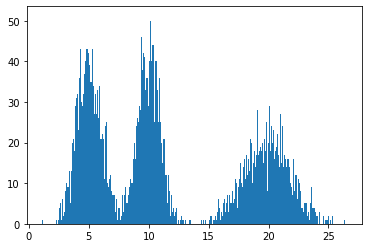

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 2000 # 각 분포에서 2,000개의 데이터 샘플링
mu_1, sigma_1 = 5, 1
mu_2, sigma_2 = 10, 1
mu_3, sigma_3 = 20, 2
X1 = np.random.normal(mu_1, sigma_1, N)
X2 = np.random.normal(mu_2, sigma_2, N)
X3 = np.random.normal(mu_3, sigma_3, N)

# 학습 데이터 생성
X = np.concatenate([X1, X2, X3])
X = np.asarray(X)

# 학습 데이터 분포 시각화
plt.hist(X, bins=500)
plt.show()

* 커스텀 데이터셋(Custom Dataset) 클래스를 정의합니다.

In [2]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class ImageDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, index):
        x = self.dataset[index % len(self.dataset)]
        return x

    def __len__(self):
        return len(self.dataset)

#### <b>학습 데이터셋 불러오기</b>

* 학습을 위해 커스텀 데이터셋을 불러옵니다.

In [3]:
train_dataset = ImageDataset(dataset=X)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)

#### <b>생성자(Generator) 및 판별자(Discriminator) 모델 정의</b>

In [4]:
import torch.nn as nn


# 생성자(Generator) 아키텍처
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        # 32차원 Latent Vector로 시작하여 고차원 레이어를 거친 뒤에 출력값 생성
        self.model = nn.Sequential(
            nn.Linear(32, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.Sigmoid(),
            nn.Linear(256, 1)
        )

    def forward(self, z):
        return self.model(z)


# 판별자(Discriminator) 아키텍처
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        # 1차원 데이터를 입력받아 고차원 레이어를 거친 뒤에 판별 결과 생성
        self.model = nn.Sequential(
            nn.Linear(1, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

#### <b>모델 학습 및 샘플링</b>

* 학습을 위해 생성자와 판별자 모델을 초기화합니다.
* 적절한 하이퍼 파라미터를 설정합니다.

In [5]:
import torch

# 생성자(generator)와 판별자(discriminator) 초기화
generator = Generator().cuda()
discriminator = Discriminator().cuda()

# 손실 함수(loss function)
adversarial_loss = nn.BCELoss().cuda()

# 학습률(learning rate) 설정
lr = 0.0005

# 생성자와 판별자를 위한 최적화 함수 정의
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

* 모델을 학습하면서 주기적으로 샘플링하여 결과를 확인할 수 있습니다.

[Epoch 0/200] [Mean of D result: 0.37] [D loss: 0.530545] [G loss: 1.243766] [Elapsed time: 0.55s]


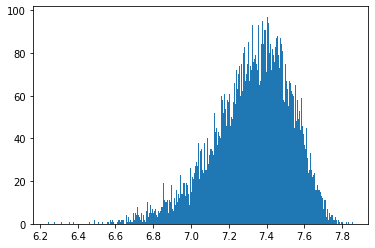

[Epoch 1/200] [Mean of D result: 0.42] [D loss: 0.692960] [G loss: 0.985439] [Elapsed time: 2.10s]
[Epoch 2/200] [Mean of D result: 0.43] [D loss: 0.619489] [G loss: 0.825655] [Elapsed time: 2.66s]
[Epoch 3/200] [Mean of D result: 0.42] [D loss: 0.663140] [G loss: 1.492580] [Elapsed time: 3.21s]
[Epoch 4/200] [Mean of D result: 0.40] [D loss: 0.530413] [G loss: 1.300141] [Elapsed time: 3.77s]
[Epoch 5/200] [Mean of D result: 0.39] [D loss: 0.493917] [G loss: 0.915871] [Elapsed time: 4.32s]
[Epoch 6/200] [Mean of D result: 0.43] [D loss: 0.602080] [G loss: 1.109359] [Elapsed time: 4.87s]
[Epoch 7/200] [Mean of D result: 0.41] [D loss: 0.738078] [G loss: 0.620499] [Elapsed time: 5.43s]
[Epoch 8/200] [Mean of D result: 0.40] [D loss: 0.597225] [G loss: 1.018276] [Elapsed time: 5.99s]
[Epoch 9/200] [Mean of D result: 0.37] [D loss: 0.469608] [G loss: 1.086678] [Elapsed time: 6.54s]
[Epoch 10/200] [Mean of D result: 0.36] [D loss: 0.548898] [G loss: 0.555110] [Elapsed time: 7.09s]


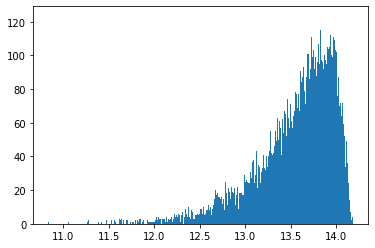

[Epoch 11/200] [Mean of D result: 0.53] [D loss: 0.608057] [G loss: 0.490838] [Elapsed time: 8.65s]
[Epoch 12/200] [Mean of D result: 0.39] [D loss: 0.684228] [G loss: 1.058335] [Elapsed time: 9.20s]
[Epoch 13/200] [Mean of D result: 0.40] [D loss: 0.610709] [G loss: 0.716836] [Elapsed time: 9.75s]
[Epoch 14/200] [Mean of D result: 0.36] [D loss: 0.526323] [G loss: 0.822622] [Elapsed time: 10.30s]
[Epoch 15/200] [Mean of D result: 0.35] [D loss: 0.465235] [G loss: 1.123802] [Elapsed time: 10.86s]
[Epoch 16/200] [Mean of D result: 0.51] [D loss: 0.876268] [G loss: 0.292382] [Elapsed time: 11.42s]
[Epoch 17/200] [Mean of D result: 0.45] [D loss: 0.682624] [G loss: 1.014072] [Elapsed time: 11.97s]
[Epoch 18/200] [Mean of D result: 0.39] [D loss: 0.618055] [G loss: 0.624109] [Elapsed time: 12.54s]
[Epoch 19/200] [Mean of D result: 0.34] [D loss: 0.544090] [G loss: 1.292256] [Elapsed time: 13.09s]
[Epoch 20/200] [Mean of D result: 0.42] [D loss: 0.717220] [G loss: 0.532448] [Elapsed time: 1

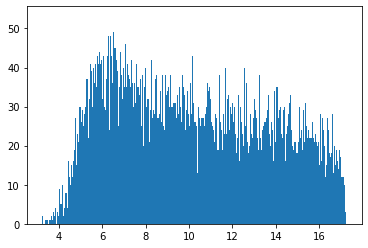

[Epoch 21/200] [Mean of D result: 0.56] [D loss: 0.684773] [G loss: 0.800307] [Elapsed time: 15.16s]
[Epoch 22/200] [Mean of D result: 0.43] [D loss: 0.682620] [G loss: 0.633133] [Elapsed time: 15.72s]
[Epoch 23/200] [Mean of D result: 0.49] [D loss: 0.685541] [G loss: 0.650953] [Elapsed time: 16.27s]
[Epoch 24/200] [Mean of D result: 0.49] [D loss: 0.697838] [G loss: 0.590280] [Elapsed time: 16.82s]
[Epoch 25/200] [Mean of D result: 0.49] [D loss: 0.700796] [G loss: 0.622711] [Elapsed time: 17.37s]
[Epoch 26/200] [Mean of D result: 0.49] [D loss: 0.702150] [G loss: 0.644894] [Elapsed time: 17.94s]
[Epoch 27/200] [Mean of D result: 0.50] [D loss: 0.696888] [G loss: 0.608863] [Elapsed time: 18.50s]
[Epoch 28/200] [Mean of D result: 0.50] [D loss: 0.694261] [G loss: 0.698979] [Elapsed time: 19.06s]
[Epoch 29/200] [Mean of D result: 0.49] [D loss: 0.689262] [G loss: 0.708465] [Elapsed time: 19.61s]
[Epoch 30/200] [Mean of D result: 0.49] [D loss: 0.691830] [G loss: 0.687556] [Elapsed time

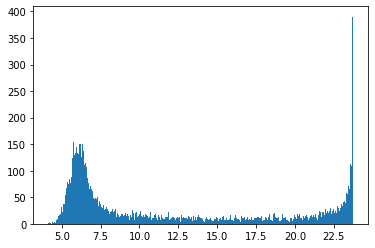

[Epoch 31/200] [Mean of D result: 0.49] [D loss: 0.686378] [G loss: 0.716987] [Elapsed time: 21.76s]
[Epoch 32/200] [Mean of D result: 0.49] [D loss: 0.685513] [G loss: 0.715306] [Elapsed time: 22.31s]
[Epoch 33/200] [Mean of D result: 0.49] [D loss: 0.689693] [G loss: 0.673159] [Elapsed time: 22.87s]
[Epoch 34/200] [Mean of D result: 0.49] [D loss: 0.688080] [G loss: 0.711124] [Elapsed time: 23.43s]
[Epoch 35/200] [Mean of D result: 0.50] [D loss: 0.687248] [G loss: 0.705295] [Elapsed time: 23.99s]
[Epoch 36/200] [Mean of D result: 0.49] [D loss: 0.691888] [G loss: 0.821151] [Elapsed time: 24.55s]
[Epoch 37/200] [Mean of D result: 0.50] [D loss: 0.693642] [G loss: 0.741153] [Elapsed time: 25.11s]
[Epoch 38/200] [Mean of D result: 0.50] [D loss: 0.685947] [G loss: 0.653313] [Elapsed time: 25.66s]
[Epoch 39/200] [Mean of D result: 0.50] [D loss: 0.690636] [G loss: 0.609242] [Elapsed time: 26.23s]
[Epoch 40/200] [Mean of D result: 0.50] [D loss: 0.683565] [G loss: 0.735123] [Elapsed time

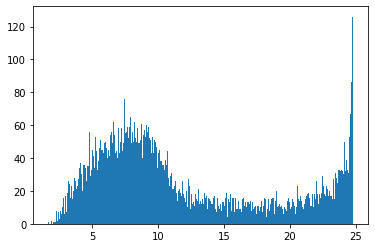

[Epoch 41/200] [Mean of D result: 0.50] [D loss: 0.688263] [G loss: 0.640410] [Elapsed time: 28.35s]
[Epoch 42/200] [Mean of D result: 0.50] [D loss: 0.686323] [G loss: 0.675075] [Elapsed time: 28.92s]
[Epoch 43/200] [Mean of D result: 0.50] [D loss: 0.693616] [G loss: 0.600669] [Elapsed time: 29.47s]
[Epoch 44/200] [Mean of D result: 0.50] [D loss: 0.696651] [G loss: 0.612947] [Elapsed time: 30.03s]
[Epoch 45/200] [Mean of D result: 0.50] [D loss: 0.694338] [G loss: 0.674777] [Elapsed time: 30.59s]
[Epoch 46/200] [Mean of D result: 0.50] [D loss: 0.690146] [G loss: 0.670436] [Elapsed time: 31.15s]
[Epoch 47/200] [Mean of D result: 0.50] [D loss: 0.689859] [G loss: 0.720792] [Elapsed time: 31.71s]
[Epoch 48/200] [Mean of D result: 0.50] [D loss: 0.691647] [G loss: 0.641908] [Elapsed time: 32.28s]
[Epoch 49/200] [Mean of D result: 0.50] [D loss: 0.689938] [G loss: 0.675578] [Elapsed time: 32.83s]
[Epoch 50/200] [Mean of D result: 0.50] [D loss: 0.688095] [G loss: 0.697198] [Elapsed time

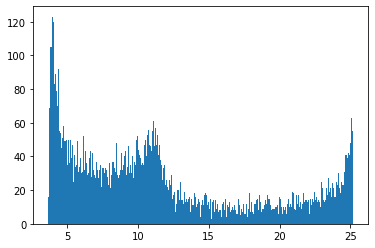

[Epoch 51/200] [Mean of D result: 0.50] [D loss: 0.688364] [G loss: 0.708926] [Elapsed time: 34.88s]
[Epoch 52/200] [Mean of D result: 0.50] [D loss: 0.690559] [G loss: 0.700657] [Elapsed time: 35.45s]
[Epoch 53/200] [Mean of D result: 0.50] [D loss: 0.700586] [G loss: 0.574049] [Elapsed time: 36.02s]
[Epoch 54/200] [Mean of D result: 0.50] [D loss: 0.692981] [G loss: 0.625098] [Elapsed time: 36.58s]
[Epoch 55/200] [Mean of D result: 0.50] [D loss: 0.688542] [G loss: 0.678351] [Elapsed time: 37.14s]
[Epoch 56/200] [Mean of D result: 0.50] [D loss: 0.693362] [G loss: 0.640741] [Elapsed time: 37.70s]
[Epoch 57/200] [Mean of D result: 0.50] [D loss: 0.694499] [G loss: 0.739067] [Elapsed time: 38.27s]
[Epoch 58/200] [Mean of D result: 0.50] [D loss: 0.693285] [G loss: 0.624420] [Elapsed time: 38.84s]
[Epoch 59/200] [Mean of D result: 0.50] [D loss: 0.690871] [G loss: 0.678228] [Elapsed time: 39.40s]
[Epoch 60/200] [Mean of D result: 0.50] [D loss: 0.692392] [G loss: 0.646482] [Elapsed time

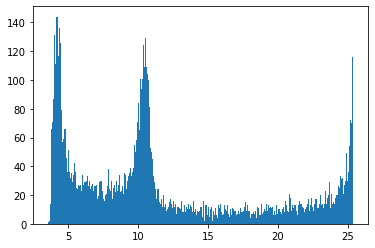

[Epoch 61/200] [Mean of D result: 0.50] [D loss: 0.702146] [G loss: 0.704500] [Elapsed time: 41.54s]
[Epoch 62/200] [Mean of D result: 0.50] [D loss: 0.688452] [G loss: 0.695017] [Elapsed time: 42.12s]
[Epoch 63/200] [Mean of D result: 0.50] [D loss: 0.695149] [G loss: 0.711798] [Elapsed time: 42.68s]
[Epoch 64/200] [Mean of D result: 0.49] [D loss: 0.705469] [G loss: 0.642540] [Elapsed time: 43.24s]
[Epoch 65/200] [Mean of D result: 0.50] [D loss: 0.701768] [G loss: 0.730770] [Elapsed time: 43.80s]
[Epoch 66/200] [Mean of D result: 0.50] [D loss: 0.683317] [G loss: 0.741730] [Elapsed time: 44.38s]
[Epoch 67/200] [Mean of D result: 0.50] [D loss: 0.690822] [G loss: 0.684001] [Elapsed time: 44.93s]
[Epoch 68/200] [Mean of D result: 0.50] [D loss: 0.687034] [G loss: 0.710376] [Elapsed time: 45.49s]
[Epoch 69/200] [Mean of D result: 0.50] [D loss: 0.704157] [G loss: 0.647015] [Elapsed time: 46.06s]
[Epoch 70/200] [Mean of D result: 0.50] [D loss: 0.695295] [G loss: 0.731743] [Elapsed time

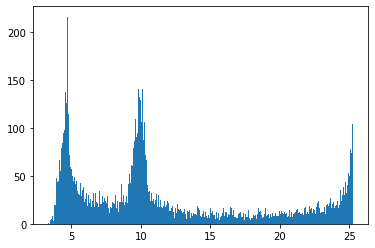

[Epoch 71/200] [Mean of D result: 0.49] [D loss: 0.694882] [G loss: 0.643620] [Elapsed time: 48.20s]
[Epoch 72/200] [Mean of D result: 0.50] [D loss: 0.695313] [G loss: 0.700282] [Elapsed time: 48.75s]
[Epoch 73/200] [Mean of D result: 0.50] [D loss: 0.698297] [G loss: 0.722320] [Elapsed time: 49.32s]
[Epoch 74/200] [Mean of D result: 0.49] [D loss: 0.711614] [G loss: 0.748627] [Elapsed time: 49.88s]
[Epoch 75/200] [Mean of D result: 0.51] [D loss: 0.686484] [G loss: 0.711158] [Elapsed time: 50.44s]
[Epoch 76/200] [Mean of D result: 0.50] [D loss: 0.689609] [G loss: 0.708970] [Elapsed time: 51.01s]
[Epoch 77/200] [Mean of D result: 0.50] [D loss: 0.698726] [G loss: 0.674816] [Elapsed time: 51.57s]
[Epoch 78/200] [Mean of D result: 0.50] [D loss: 0.695605] [G loss: 0.698430] [Elapsed time: 52.12s]
[Epoch 79/200] [Mean of D result: 0.50] [D loss: 0.693192] [G loss: 0.681995] [Elapsed time: 52.69s]
[Epoch 80/200] [Mean of D result: 0.49] [D loss: 0.694180] [G loss: 0.720769] [Elapsed time

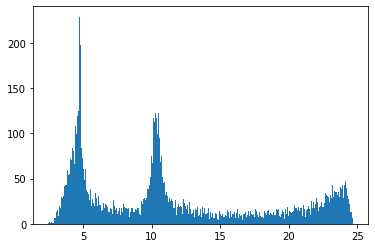

[Epoch 81/200] [Mean of D result: 0.51] [D loss: 0.696290] [G loss: 0.690842] [Elapsed time: 54.76s]
[Epoch 82/200] [Mean of D result: 0.50] [D loss: 0.700369] [G loss: 0.656231] [Elapsed time: 55.32s]
[Epoch 83/200] [Mean of D result: 0.49] [D loss: 0.691790] [G loss: 0.696271] [Elapsed time: 55.88s]
[Epoch 84/200] [Mean of D result: 0.50] [D loss: 0.705637] [G loss: 0.798401] [Elapsed time: 56.44s]
[Epoch 85/200] [Mean of D result: 0.50] [D loss: 0.695977] [G loss: 0.712787] [Elapsed time: 56.99s]
[Epoch 86/200] [Mean of D result: 0.49] [D loss: 0.692995] [G loss: 0.721414] [Elapsed time: 57.57s]
[Epoch 87/200] [Mean of D result: 0.50] [D loss: 0.694630] [G loss: 0.694498] [Elapsed time: 58.12s]
[Epoch 88/200] [Mean of D result: 0.50] [D loss: 0.695140] [G loss: 0.702129] [Elapsed time: 58.68s]
[Epoch 89/200] [Mean of D result: 0.50] [D loss: 0.693095] [G loss: 0.703998] [Elapsed time: 59.24s]
[Epoch 90/200] [Mean of D result: 0.50] [D loss: 0.694023] [G loss: 0.713127] [Elapsed time

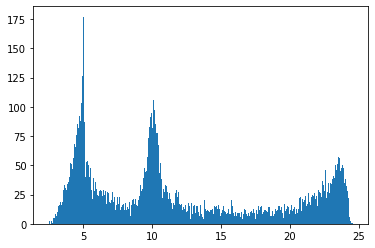

[Epoch 91/200] [Mean of D result: 0.50] [D loss: 0.692053] [G loss: 0.699767] [Elapsed time: 61.39s]
[Epoch 92/200] [Mean of D result: 0.50] [D loss: 0.692387] [G loss: 0.703513] [Elapsed time: 61.95s]
[Epoch 93/200] [Mean of D result: 0.50] [D loss: 0.695731] [G loss: 0.648344] [Elapsed time: 62.50s]
[Epoch 94/200] [Mean of D result: 0.50] [D loss: 0.692846] [G loss: 0.686976] [Elapsed time: 63.05s]
[Epoch 95/200] [Mean of D result: 0.50] [D loss: 0.691939] [G loss: 0.743817] [Elapsed time: 63.62s]
[Epoch 96/200] [Mean of D result: 0.50] [D loss: 0.691065] [G loss: 0.730397] [Elapsed time: 64.17s]
[Epoch 97/200] [Mean of D result: 0.50] [D loss: 0.688592] [G loss: 0.689210] [Elapsed time: 64.74s]
[Epoch 98/200] [Mean of D result: 0.50] [D loss: 0.693681] [G loss: 0.662952] [Elapsed time: 65.29s]
[Epoch 99/200] [Mean of D result: 0.50] [D loss: 0.691155] [G loss: 0.689995] [Elapsed time: 65.85s]
[Epoch 100/200] [Mean of D result: 0.50] [D loss: 0.694168] [G loss: 0.685248] [Elapsed tim

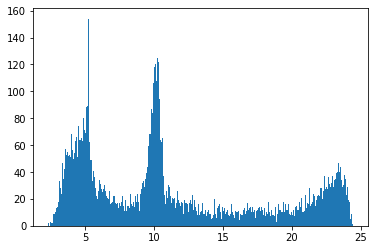

[Epoch 101/200] [Mean of D result: 0.50] [D loss: 0.692151] [G loss: 0.667596] [Elapsed time: 67.90s]
[Epoch 102/200] [Mean of D result: 0.50] [D loss: 0.692815] [G loss: 0.691618] [Elapsed time: 68.46s]
[Epoch 103/200] [Mean of D result: 0.50] [D loss: 0.693313] [G loss: 0.683365] [Elapsed time: 69.02s]
[Epoch 104/200] [Mean of D result: 0.50] [D loss: 0.691661] [G loss: 0.703428] [Elapsed time: 69.59s]
[Epoch 105/200] [Mean of D result: 0.50] [D loss: 0.692316] [G loss: 0.746796] [Elapsed time: 70.15s]
[Epoch 106/200] [Mean of D result: 0.50] [D loss: 0.693046] [G loss: 0.696738] [Elapsed time: 70.73s]
[Epoch 107/200] [Mean of D result: 0.50] [D loss: 0.691011] [G loss: 0.710905] [Elapsed time: 71.29s]
[Epoch 108/200] [Mean of D result: 0.50] [D loss: 0.690540] [G loss: 0.699230] [Elapsed time: 71.85s]
[Epoch 109/200] [Mean of D result: 0.50] [D loss: 0.693050] [G loss: 0.680429] [Elapsed time: 72.41s]
[Epoch 110/200] [Mean of D result: 0.50] [D loss: 0.695655] [G loss: 0.658136] [El

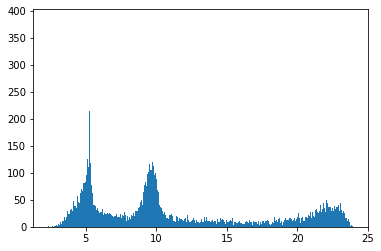

[Epoch 111/200] [Mean of D result: 0.50] [D loss: 0.687761] [G loss: 0.709130] [Elapsed time: 74.57s]
[Epoch 112/200] [Mean of D result: 0.50] [D loss: 0.697924] [G loss: 0.700085] [Elapsed time: 75.13s]
[Epoch 113/200] [Mean of D result: 0.50] [D loss: 0.693573] [G loss: 0.675278] [Elapsed time: 75.69s]
[Epoch 114/200] [Mean of D result: 0.50] [D loss: 0.692775] [G loss: 0.706693] [Elapsed time: 76.25s]
[Epoch 115/200] [Mean of D result: 0.50] [D loss: 0.692769] [G loss: 0.691073] [Elapsed time: 76.81s]
[Epoch 116/200] [Mean of D result: 0.50] [D loss: 0.693893] [G loss: 0.684692] [Elapsed time: 77.38s]
[Epoch 117/200] [Mean of D result: 0.50] [D loss: 0.694418] [G loss: 0.694956] [Elapsed time: 77.95s]
[Epoch 118/200] [Mean of D result: 0.50] [D loss: 0.692022] [G loss: 0.693936] [Elapsed time: 78.51s]
[Epoch 119/200] [Mean of D result: 0.50] [D loss: 0.696418] [G loss: 0.717102] [Elapsed time: 79.06s]
[Epoch 120/200] [Mean of D result: 0.50] [D loss: 0.693975] [G loss: 0.717043] [El

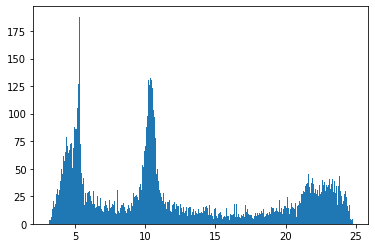

[Epoch 121/200] [Mean of D result: 0.50] [D loss: 0.695488] [G loss: 0.687637] [Elapsed time: 81.21s]
[Epoch 122/200] [Mean of D result: 0.50] [D loss: 0.690596] [G loss: 0.714900] [Elapsed time: 81.77s]
[Epoch 123/200] [Mean of D result: 0.50] [D loss: 0.693247] [G loss: 0.652351] [Elapsed time: 82.32s]
[Epoch 124/200] [Mean of D result: 0.50] [D loss: 0.696613] [G loss: 0.712400] [Elapsed time: 82.88s]
[Epoch 125/200] [Mean of D result: 0.50] [D loss: 0.693930] [G loss: 0.695558] [Elapsed time: 83.43s]
[Epoch 126/200] [Mean of D result: 0.50] [D loss: 0.694914] [G loss: 0.674638] [Elapsed time: 83.99s]
[Epoch 127/200] [Mean of D result: 0.50] [D loss: 0.692557] [G loss: 0.681531] [Elapsed time: 84.55s]
[Epoch 128/200] [Mean of D result: 0.50] [D loss: 0.693686] [G loss: 0.672171] [Elapsed time: 85.11s]
[Epoch 129/200] [Mean of D result: 0.50] [D loss: 0.694564] [G loss: 0.680500] [Elapsed time: 85.67s]
[Epoch 130/200] [Mean of D result: 0.50] [D loss: 0.693562] [G loss: 0.697462] [El

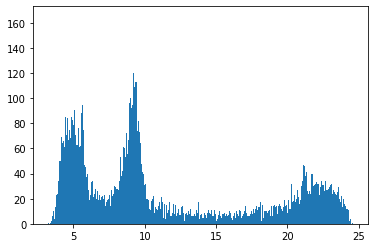

[Epoch 131/200] [Mean of D result: 0.50] [D loss: 0.691934] [G loss: 0.704451] [Elapsed time: 87.72s]
[Epoch 132/200] [Mean of D result: 0.50] [D loss: 0.691478] [G loss: 0.671011] [Elapsed time: 88.29s]
[Epoch 133/200] [Mean of D result: 0.50] [D loss: 0.691688] [G loss: 0.694156] [Elapsed time: 88.86s]
[Epoch 134/200] [Mean of D result: 0.50] [D loss: 0.693832] [G loss: 0.702793] [Elapsed time: 89.41s]
[Epoch 135/200] [Mean of D result: 0.50] [D loss: 0.693234] [G loss: 0.685658] [Elapsed time: 89.98s]
[Epoch 136/200] [Mean of D result: 0.50] [D loss: 0.692807] [G loss: 0.686831] [Elapsed time: 90.55s]
[Epoch 137/200] [Mean of D result: 0.50] [D loss: 0.693218] [G loss: 0.662481] [Elapsed time: 91.11s]
[Epoch 138/200] [Mean of D result: 0.50] [D loss: 0.691220] [G loss: 0.693406] [Elapsed time: 91.67s]
[Epoch 139/200] [Mean of D result: 0.50] [D loss: 0.695516] [G loss: 0.702576] [Elapsed time: 92.24s]
[Epoch 140/200] [Mean of D result: 0.50] [D loss: 0.693788] [G loss: 0.683160] [El

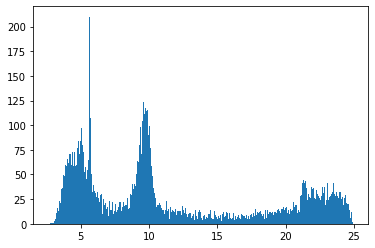

[Epoch 141/200] [Mean of D result: 0.50] [D loss: 0.693392] [G loss: 0.677333] [Elapsed time: 94.39s]
[Epoch 142/200] [Mean of D result: 0.50] [D loss: 0.692048] [G loss: 0.710483] [Elapsed time: 94.95s]
[Epoch 143/200] [Mean of D result: 0.50] [D loss: 0.694373] [G loss: 0.676530] [Elapsed time: 95.51s]
[Epoch 144/200] [Mean of D result: 0.50] [D loss: 0.693641] [G loss: 0.670281] [Elapsed time: 96.06s]
[Epoch 145/200] [Mean of D result: 0.50] [D loss: 0.692993] [G loss: 0.690509] [Elapsed time: 96.63s]
[Epoch 146/200] [Mean of D result: 0.50] [D loss: 0.693005] [G loss: 0.694546] [Elapsed time: 97.19s]
[Epoch 147/200] [Mean of D result: 0.50] [D loss: 0.693279] [G loss: 0.693078] [Elapsed time: 97.74s]
[Epoch 148/200] [Mean of D result: 0.50] [D loss: 0.693030] [G loss: 0.672287] [Elapsed time: 98.29s]
[Epoch 149/200] [Mean of D result: 0.50] [D loss: 0.693191] [G loss: 0.695134] [Elapsed time: 98.85s]
[Epoch 150/200] [Mean of D result: 0.50] [D loss: 0.693359] [G loss: 0.660428] [El

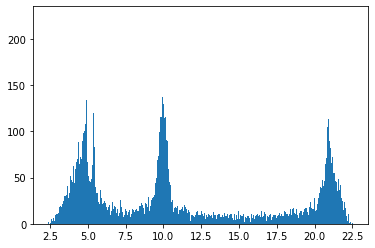

[Epoch 151/200] [Mean of D result: 0.50] [D loss: 0.693061] [G loss: 0.692443] [Elapsed time: 101.02s]
[Epoch 152/200] [Mean of D result: 0.50] [D loss: 0.693944] [G loss: 0.698222] [Elapsed time: 101.59s]
[Epoch 153/200] [Mean of D result: 0.50] [D loss: 0.691990] [G loss: 0.707800] [Elapsed time: 102.17s]
[Epoch 154/200] [Mean of D result: 0.50] [D loss: 0.694342] [G loss: 0.694821] [Elapsed time: 102.75s]
[Epoch 155/200] [Mean of D result: 0.50] [D loss: 0.692933] [G loss: 0.710970] [Elapsed time: 103.34s]
[Epoch 156/200] [Mean of D result: 0.50] [D loss: 0.692612] [G loss: 0.678160] [Elapsed time: 103.91s]
[Epoch 157/200] [Mean of D result: 0.50] [D loss: 0.693773] [G loss: 0.687605] [Elapsed time: 104.49s]
[Epoch 158/200] [Mean of D result: 0.50] [D loss: 0.693249] [G loss: 0.702269] [Elapsed time: 105.06s]
[Epoch 159/200] [Mean of D result: 0.50] [D loss: 0.693144] [G loss: 0.692194] [Elapsed time: 105.62s]
[Epoch 160/200] [Mean of D result: 0.50] [D loss: 0.693040] [G loss: 0.71

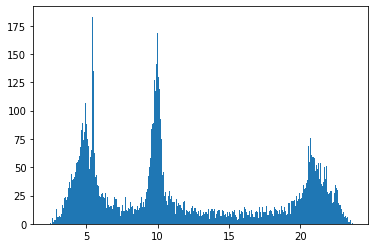

[Epoch 161/200] [Mean of D result: 0.50] [D loss: 0.692991] [G loss: 0.685605] [Elapsed time: 107.68s]
[Epoch 162/200] [Mean of D result: 0.50] [D loss: 0.693370] [G loss: 0.691011] [Elapsed time: 108.24s]
[Epoch 163/200] [Mean of D result: 0.50] [D loss: 0.692758] [G loss: 0.699554] [Elapsed time: 108.79s]
[Epoch 164/200] [Mean of D result: 0.50] [D loss: 0.692870] [G loss: 0.705882] [Elapsed time: 109.35s]
[Epoch 165/200] [Mean of D result: 0.50] [D loss: 0.693170] [G loss: 0.685180] [Elapsed time: 109.92s]
[Epoch 166/200] [Mean of D result: 0.50] [D loss: 0.693106] [G loss: 0.691977] [Elapsed time: 110.49s]
[Epoch 167/200] [Mean of D result: 0.50] [D loss: 0.692412] [G loss: 0.688216] [Elapsed time: 111.05s]
[Epoch 168/200] [Mean of D result: 0.50] [D loss: 0.692957] [G loss: 0.696489] [Elapsed time: 111.62s]
[Epoch 169/200] [Mean of D result: 0.50] [D loss: 0.693144] [G loss: 0.683258] [Elapsed time: 112.19s]
[Epoch 170/200] [Mean of D result: 0.50] [D loss: 0.692861] [G loss: 0.70

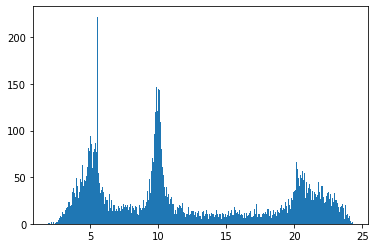

[Epoch 171/200] [Mean of D result: 0.50] [D loss: 0.693015] [G loss: 0.696107] [Elapsed time: 114.35s]
[Epoch 172/200] [Mean of D result: 0.50] [D loss: 0.693690] [G loss: 0.698557] [Elapsed time: 114.91s]
[Epoch 173/200] [Mean of D result: 0.50] [D loss: 0.692957] [G loss: 0.667034] [Elapsed time: 115.49s]
[Epoch 174/200] [Mean of D result: 0.50] [D loss: 0.692767] [G loss: 0.677937] [Elapsed time: 116.04s]
[Epoch 175/200] [Mean of D result: 0.50] [D loss: 0.693222] [G loss: 0.685438] [Elapsed time: 116.61s]
[Epoch 176/200] [Mean of D result: 0.50] [D loss: 0.693343] [G loss: 0.674787] [Elapsed time: 117.17s]
[Epoch 177/200] [Mean of D result: 0.50] [D loss: 0.692985] [G loss: 0.696777] [Elapsed time: 117.74s]
[Epoch 178/200] [Mean of D result: 0.50] [D loss: 0.692471] [G loss: 0.707634] [Elapsed time: 118.30s]
[Epoch 179/200] [Mean of D result: 0.50] [D loss: 0.693203] [G loss: 0.679763] [Elapsed time: 118.86s]
[Epoch 180/200] [Mean of D result: 0.50] [D loss: 0.693413] [G loss: 0.68

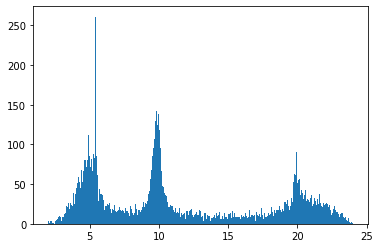

[Epoch 181/200] [Mean of D result: 0.50] [D loss: 0.693339] [G loss: 0.693261] [Elapsed time: 120.98s]
[Epoch 182/200] [Mean of D result: 0.50] [D loss: 0.692694] [G loss: 0.677385] [Elapsed time: 121.55s]
[Epoch 183/200] [Mean of D result: 0.50] [D loss: 0.692761] [G loss: 0.694639] [Elapsed time: 122.10s]
[Epoch 184/200] [Mean of D result: 0.50] [D loss: 0.692936] [G loss: 0.689561] [Elapsed time: 122.66s]
[Epoch 185/200] [Mean of D result: 0.50] [D loss: 0.692928] [G loss: 0.694955] [Elapsed time: 123.21s]
[Epoch 186/200] [Mean of D result: 0.50] [D loss: 0.693266] [G loss: 0.682303] [Elapsed time: 123.78s]
[Epoch 187/200] [Mean of D result: 0.50] [D loss: 0.693241] [G loss: 0.701634] [Elapsed time: 124.33s]
[Epoch 188/200] [Mean of D result: 0.50] [D loss: 0.693118] [G loss: 0.709754] [Elapsed time: 124.90s]
[Epoch 189/200] [Mean of D result: 0.50] [D loss: 0.693123] [G loss: 0.693840] [Elapsed time: 125.47s]
[Epoch 190/200] [Mean of D result: 0.50] [D loss: 0.693305] [G loss: 0.69

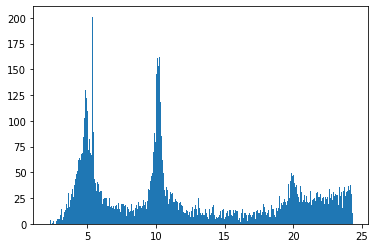

[Epoch 191/200] [Mean of D result: 0.50] [D loss: 0.693134] [G loss: 0.712927] [Elapsed time: 127.51s]
[Epoch 192/200] [Mean of D result: 0.50] [D loss: 0.693360] [G loss: 0.679294] [Elapsed time: 128.07s]
[Epoch 193/200] [Mean of D result: 0.50] [D loss: 0.693055] [G loss: 0.687029] [Elapsed time: 128.64s]
[Epoch 194/200] [Mean of D result: 0.50] [D loss: 0.693021] [G loss: 0.684059] [Elapsed time: 129.19s]
[Epoch 195/200] [Mean of D result: 0.50] [D loss: 0.693253] [G loss: 0.698625] [Elapsed time: 129.75s]
[Epoch 196/200] [Mean of D result: 0.50] [D loss: 0.693043] [G loss: 0.692804] [Elapsed time: 130.31s]
[Epoch 197/200] [Mean of D result: 0.50] [D loss: 0.693109] [G loss: 0.688586] [Elapsed time: 130.88s]
[Epoch 198/200] [Mean of D result: 0.50] [D loss: 0.693096] [G loss: 0.691308] [Elapsed time: 131.43s]
[Epoch 199/200] [Mean of D result: 0.50] [D loss: 0.693218] [G loss: 0.689386] [Elapsed time: 132.00s]


In [6]:
import time

n_epochs = 200 # 학습의 횟수(epoch) 설정
sample_interval = 10 # 몇 번의 epoch마다 결과를 출력할 것인지 설정 
start_time = time.time()

for epoch in range(n_epochs):
    d_outputs = [] # Discriminator의 판별 결과가 담길 리스트

    for i, batch in enumerate(train_dataloader):
        inputs = batch
        inputs = inputs.unsqueeze(1).float().cuda() # 차원: [배치 크기, 1]

        # 진짜(real) 데이터와 가짜(fake) 데이터에 대한 정답 레이블 생성
        real = torch.cuda.FloatTensor(inputs.size(0), 1).fill_(1.0).cuda() # 진짜(real): 1
        fake = torch.cuda.FloatTensor(inputs.size(0), 1).fill_(0.0).cuda() # 가짜(fake): 0

        """ 생성자(generator)를 학습합니다. """
        optimizer_G.zero_grad()

        # 랜덤 노이즈(noise) 샘플링
        z = torch.normal(mean=0, std=1, size=(inputs.size(0), 32)).cuda()

        # 이미지 생성
        generated = generator(z)

        # 생성자(generator)의 손실(loss) 값 계산
        g_loss = adversarial_loss(discriminator(generated), real)

        # 생성자(generator) 업데이트
        g_loss.backward()
        optimizer_G.step()

        """ 판별자(discriminator)를 학습합니다. """
        optimizer_D.zero_grad()

        # 판별자(discriminator)의 손실(loss) 값 계산
        real_loss = adversarial_loss(discriminator(inputs), real)
        d_output = discriminator(generated.detach())
        fake_loss = adversarial_loss(d_output, fake)
        d_loss = (real_loss + fake_loss) / 2

        d_outputs.append(sum(d_output.detach().cpu()).item()) # 판별 결과는 별도로 저장

        # 판별자(discriminator) 업데이트
        d_loss.backward()
        optimizer_D.step()

    # 하나의 epoch이 끝날 때마다 로그(log) 출력
    print(f"[Epoch {epoch}/{n_epochs}] [Mean of D result: {sum(d_outputs) / len(X):.2f}] [D loss: {d_loss.item():.6f}] [G loss: {g_loss.item():.6f}] [Elapsed time: {time.time() - start_time:.2f}s]")

    if epoch % sample_interval == 0:
        sampled = []
        for i in range(100):
            # 랜덤 노이즈(noise) 샘플링
            z = torch.normal(mean=0, std=1, size=(128, 32)).cuda()
            generated = generator(z)
            # 하나의 배치에 포함된 모든 결과 데이터를 리스트에 삽입
            for k in generated.detach().cpu():
                sampled.append(k)

        # 결과 데이터 출력
        plt.hist(sampled, bins=500)
        plt.show()